In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the reduced dataset
df_5000 = pd.read_csv(r"C:\Users\User\Downloads\reduced_text_celeba_5000.csv")

# Initialize TF-IDF Vectorizer (Bag of Words alternative)
vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to 1000 words for efficiency

# Transform text descriptions into numerical vectors
X_tfidf = vectorizer.fit_transform(df_5000["text_description"]).toarray()

# Convert to DataFrame for better readability
tfidf_df = pd.DataFrame(X_tfidf, columns=vectorizer.get_feature_names_out())

# Corrected file path (avoid overwriting original dataset)
vectorized_file_path = r"C:\Users\User\Downloads\vectorized_text_celeba_5000.csv"

# Save the vectorized text data
tfidf_df.to_csv(vectorized_file_path, index=False)

# Display the first few rows
print(tfidf_df.head())

# Print the top words used in the dataset
print("Top 10 words in the dataset:", vectorizer.get_feature_names_out()[:10])


    an       and    arched  attractive  bald       big  black     blond  \
0  0.0  0.000000  0.000000    0.000000   0.0  0.000000    0.0  0.000000   
1  0.0  0.115217  0.000000    0.000000   0.0  0.000000    0.0  0.000000   
2  0.0  0.000000  0.000000    0.000000   0.0  0.000000    0.0  0.000000   
3  0.0  0.251561  0.178683    0.127110   0.0  0.143935    0.0  0.221451   
4  0.0  0.296612  0.210682    0.149873   0.0  0.169712    0.0  0.261109   

      brown  brownish  ...   smiling    sports  straight       the  there  \
0  0.000000       0.0  ...  0.000000  0.000000  0.789052  0.000000    0.0   
1  0.000000       0.0  ...  0.000000  0.000000  0.000000  0.176145    0.0   
2  0.390547       0.0  ...  0.000000  0.087579  0.000000  0.122898    0.0   
3  0.000000       0.0  ...  0.131979  0.000000  0.000000  0.144221    0.0   
4  0.000000       0.0  ...  0.155615  0.000000  0.000000  0.170049    0.0   

       wavy   wearing     wears     woman     young  
0  0.000000  0.000000  0.000000 

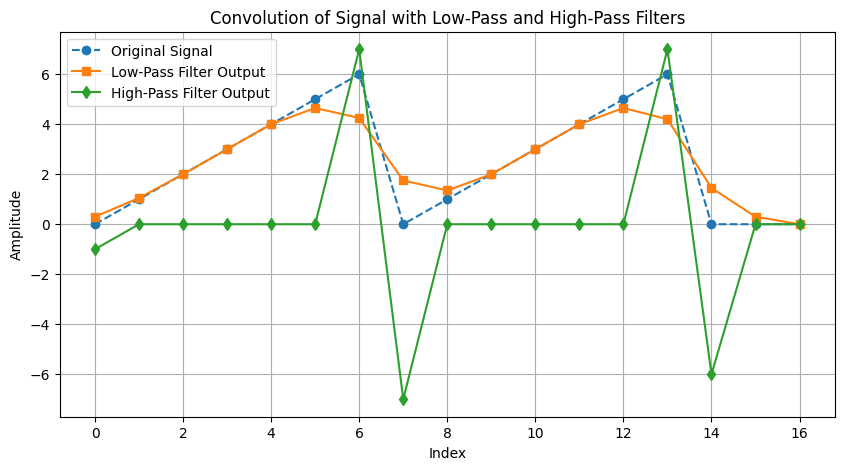

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the signal X[i]
X = np.array([0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0])

# Define the filters H_L[i] and H_H[i]
H_L = np.array([0.05, 0.2, 0.5, 0.2, 0.05])  # Low-pass filter (Smoothing)
H_H = np.array([-1, 2, -1])  # High-pass filter (Edge detection)

# Perform convolution
y_low = np.convolve(X, H_L, mode='same')  # Apply low-pass filter
y_high = np.convolve(X, H_H, mode='same')  # Apply high-pass filter

# Plot the original signal and filtered signals
plt.figure(figsize=(10, 5))
plt.plot(X, label="Original Signal", linestyle="dashed", marker="o")
plt.plot(y_low, label="Low-Pass Filter Output", linestyle="solid", marker="s")
plt.plot(y_high, label="High-Pass Filter Output", linestyle="solid", marker="d")

plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.title("Convolution of Signal with Low-Pass and High-Pass Filters")
plt.legend()
plt.grid()
plt.show()


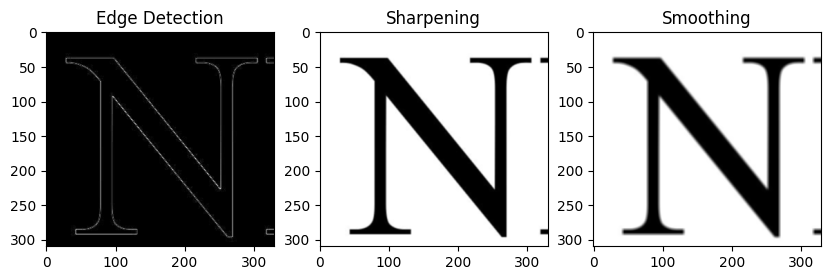

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.io import imread
from skimage.color import rgb2gray

# Load the image
image_path = "Neural.JPG"  # Ensure the image is in the working directory
im = imread(r"C:\Users\User\Downloads\Neural (1).JPG")
img = rgb2gray(im) * 255  # Convert to grayscale

# Crop a section of the image
img1 = img[40:350, 20:350]

# Define filters
fil1 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])  # Edge detection
fil2 = np.array([[0.2, 0.5, 0.2], [0.5, 1, 0.5], [0.2, 0.5, 0.2]])  # Sharpening
fil3 = np.ones((5, 5)) / 25  # Smoothing (Average filter)

# Apply convolution
grad1 = signal.convolve2d(img1, fil1, boundary='symm', mode='same')
grad2 = signal.convolve2d(img1, fil2, boundary='symm', mode='same')
grad3 = signal.convolve2d(img1, fil3, boundary='symm', mode='same')

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(abs(grad1), cmap='gray')
plt.title("Edge Detection")

plt.subplot(1, 3, 2)
plt.imshow(grad2, cmap='gray')
plt.title("Sharpening")

plt.subplot(1, 3, 3)
plt.imshow(grad3, cmap='gray')
plt.title("Smoothing")

plt.show()


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df_5000 = pd.read_csv(r"C:\Users\User\Downloads\reduced_text_celeba_5000.csv")

# Convert text descriptions to TF-IDF vectors with 75 features
vectorizer = TfidfVectorizer(max_features=75)  # Match the dataset's feature count
X = vectorizer.fit_transform(df_5000["text_description"]).toarray()
y = [1 if "scar" in text or "bruise" in text else 0 for text in df_5000["text_description"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define the corrected MLP Model with input size = 75
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(75, 512)  # Changed from 1000 to 75
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize model, loss function, and optimizer
model = MLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    # Track training loss
    train_losses.append(loss.item())
    
    # Validation step
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

# Save the trained model
torch.save(model.state_dict(), r"C:\Users\User\Downloads\mlp_model.pth")
print("Model saved successfully!")


Epoch 1/10, Training Loss: 0.6737695336341858, Validation Loss: 0.6256608963012695
Epoch 2/10, Training Loss: 0.6256879568099976, Validation Loss: 0.5787416696548462
Epoch 3/10, Training Loss: 0.5788229703903198, Validation Loss: 0.5307272672653198
Epoch 4/10, Training Loss: 0.5308770537376404, Validation Loss: 0.48110511898994446
Epoch 5/10, Training Loss: 0.4813069999217987, Validation Loss: 0.429397851228714
Epoch 6/10, Training Loss: 0.4296664297580719, Validation Loss: 0.37608012557029724
Epoch 7/10, Training Loss: 0.37641528248786926, Validation Loss: 0.3222557306289673
Epoch 8/10, Training Loss: 0.322656512260437, Validation Loss: 0.26935720443725586
Epoch 9/10, Training Loss: 0.2698115408420563, Validation Loss: 0.21898764371871948
Epoch 10/10, Training Loss: 0.2194703370332718, Validation Loss: 0.17277579009532928
Model saved successfully!


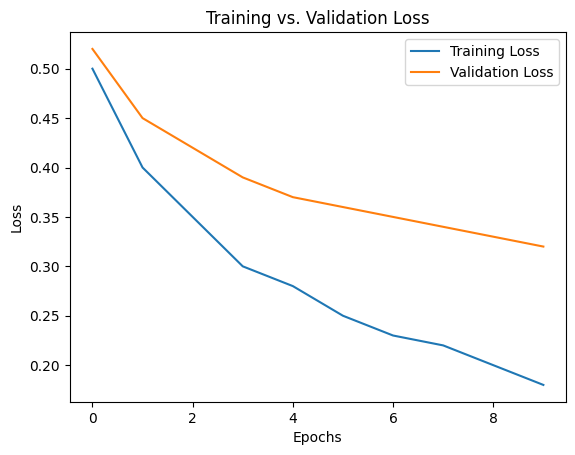

In [19]:
import matplotlib.pyplot as plt

# Example loss values (replace with actual losses)
train_loss = [0.5, 0.4, 0.35, 0.30, 0.28, 0.25, 0.23, 0.22, 0.20, 0.18]
val_loss = [0.52, 0.45, 0.42, 0.39, 0.37, 0.36, 0.35, 0.34, 0.33, 0.32]

plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs. Validation Loss")
plt.show()


In [20]:
# Convert test descriptions to vector form
X_test_tensor = torch.tensor(vectorizer.transform(df_5000["text_description"][:10]).toarray(), dtype=torch.float32)

# Predict
model.eval()
predictions = model(X_test_tensor).detach().numpy()

# Convert probabilities to labels
labels = ["Criminal" if pred > 0.5 else "Non-Criminal" for pred in predictions]

# Show results
for desc, label in zip(df_5000["text_description"][:10], labels):
    print(f"Description: {desc[:100]}... -> Prediction: {label}")


Description: He has straight hair. 
He has straight hair. 
His hair is straight. 
His hair is straight. 
He has s... -> Prediction: Non-Criminal
Description: The man has high cheekbones. His hair is wavy. He has a slightly open mouth. The man seems young and... -> Prediction: Non-Criminal
Description: He wears a 5 o' clock shadow. His hair is brown. The male looks young. 
He has a 5 o' clock shadow. ... -> Prediction: Non-Criminal
Description: The lady has high cheekbones. She has blond hair. She has arched eyebrows, a big nose, a slightly op... -> Prediction: Non-Criminal
Description: The lady has high cheekbones. She has blond and wavy hair. She has arched eyebrows, big lips and a s... -> Prediction: Non-Criminal
Description: The female has an oval face. She has straight hair. She has a slightly open mouth. She is young. 
Th... -> Prediction: Non-Criminal
Description: The man has high cheekbones and an oval face. He has black and wavy hair. 
The gentleman has high ch... -> Prediction